In [22]:
np.eye(3,3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [20]:
def make_special_orthogonal(A):
    """
    Returns symmetric matrix by copying -1*upper triangular onto lower.
    """
    A = np.asarray(A)
    sh = A.shape
    if (len(sh) == 2) & (sh[0] == sh[1]):
        k = (np.linalg.det(A))**(1/sh[0])
        if abs(k) < 1e-4:
            raise Exception('A has determinant 0 - can not be a rotation')
        U = (1/k) * A
    else:
        raise Exception('A must be a square matrix')
    return U
A = np.random.rand(3,3)
A = np.arange(3**3).reshape(3,3,3)
print(np.linalg.det(A))
B = make_special_orthogonal(A)
print(np.linalg.det(B))

[  0.00000000e+00   4.99600361e-15   0.00000000e+00]


Exception: A must be a square matrix

In [1]:
#setup 3D Wedge
%run -i program/billiard_defs.py
%run -i program/analysis.py

dim = 3
max_steps = 50
pw_collision_law = 'no_slip'
# pw_collision_law = 'specular'

wedge_vertex = np.array([0,0,0])
wedge_axis = munit(np.array([1,0,0]))
wedge_height = 100
wedge_vertex_angle = np.pi/6
cosva = np.cos(wedge_vertex_angle)
sinva = np.sin(wedge_vertex_angle)

r = wedge_height * np.tan(wedge_vertex_angle)

# wall = [FlatWall(name='left', pos=wedge_vertex, normal=[0,cosva,sinva], half_length=30, collision_law=pw_collision_law)
#        ,FlatWall(name='right',pos=wedge_vertex, normal=[0,-1*cosva,sinva], half_length=30, collision_law=pw_collision_law)
#        ]
wall = [FlatWall(name='left', pos=wedge_vertex, basis=np.array([[0,cosva,sinva],[1,0,0]]), half_length=30, collision_law=pw_collision_law)
       ,FlatWall(name='right',pos=wedge_vertex, basis=np.array([[0,-1*cosva,sinva],[1,0,0]]), half_length=30, collision_law=pw_collision_law)
       ]

lab_frame = wall[0].basis.copy()

bounding_box = np.array([[-r,r]
                         ,[-r,r]
                         ,[0,wedge_height]
                        ])

# Used for visualization later
surface_data_dict = []
for w in wall:
    w.parametrize()
    data_dict = {
        'name': w.name,
        'type': 'surface',
        'opacity': 0.4,
        'colorscale': [[0, 'rgb(0,0,255)'], [1, 'rgb(0,0,255)']],
        'showscale': False,
        'x': w.param[0],
        'y': w.param[1],
        'z': w.param[2]
    }
    surface_data_dict.append(data_dict)

In [2]:
# Setup particles

num_part = 1
mass = 1
gamma = 'uniform'  #parameter btw 0 mass at center) and sqrt(2/dim) (mass on outside shell)
radius = 1
temp = 10
pp_collision_law = 'no_slip'
# pp_collision_law = 'specular'

init_pos = [0,0,20]
init_vel = [.1, -1.0, 0]


In [21]:
%run -i program/billiard_defs.py
%run -i program/analysis.py

max_steps = 10
max_distort = 1000  # Used after experiment to determine whether to interpolate between collisions
# If so, how much distortion to allow.  Must be 0-100, smaller <-> more frames and smoother, but longer 
# processing and larger files.  Anything other than 0-100 will turn off smoothing

try:
    step = 'init'
    part = Particles(wall, num=num_part, mass=mass, gamma=gamma
                 ,radius=radius, temp=temp, collision_law=pp_collision_law
                 ,pos=init_pos  # comment this line out for random init pos
                 ,vel=init_vel  # comment this line out for random init vel
                 #,spin=init_spin
                )
    init_spin = [sinva * part.vel[0,1] / (part.radius[0] * part.gamma[0]**2), 0, 0]
    part.spin[0] = v_to_m(init_spin)
    print(part.pos)
    print(part.vel)
    print(part.spin)
    init(wall, part)
    for step in range(max_steps):
        do_the_evolution()
except:
    error_report()

re_t, re_pos, re_vel, re_orient, re_spin = smoother(max_distort)
S, P, D, M = re_pos.shape

print("Finished it all.  There are {} frames in this animation of {} particles.".format(S, P))

[[  0.   0.  20.]]
[[ 0.1 -1.   0. ]]
[[[ 0.    0.    0.  ]
  [ 0.    0.    1.25]
  [ 0.   -1.25  0.  ]]]
Finished it all.  There are 11 frames in this animation of 1 particles.


In [12]:
re_pos

(11, 1, 3, 1)

In [25]:
interactive_plotly_stable()

using newer


In [24]:
for step in range(S):
    print(np.linalg.det(re_orient[step]))

[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]
[ 1.]


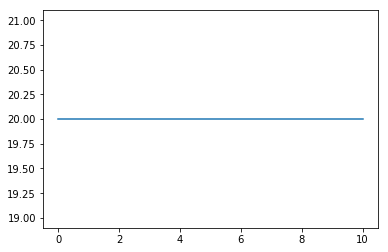

In [18]:
plt.plot(re_orient[:,0,2])
plt.show()

In [30]:
pos_hist[:,0,0]

array([  0.        ,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485,
       -10.39230485,  10.39230485, -10.39230485,  10.39230485, -10.39230485])

In [30]:
re_pos[:,0,0,0].shape

(11,)

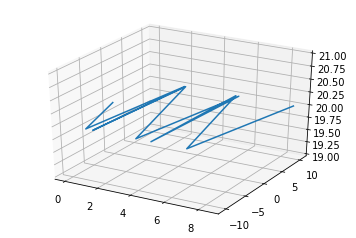

In [32]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(re_pos[:,0,0,0], re_pos[:,0,1,0], re_pos[:,0,2,0])

plt.show()